In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

In [5]:
models = [
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    ExtraTreeRegressor(),
    SVR(),
    LinearRegression()
]

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [15]:
def test_model(df, models, target):
    X = df.drop([target], axis = 1).values
    Y = df[target].values
    # impartim setul de date de doua subseturi
    # unul testare
    # al doilea atrenare
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)
    
    # definim dictionarul pentru a calcula eroarea
    mse, mae, mse_normalized, mae_normalized = {}, {}, {}, {}
    scaler = StandardScaler()
    
    # antrenam setul de date pentru toate modelele
    for i in range(len(models)):
        models[i].fit(X_train, Y_train)
        Y_pred = models[i].predict(X_test)
        
        mae[str(models[i].__class__())] = mean_absolute_error(Y_pred, Y_test)
        mse[str(models[i].__class__())] = mean_squared_error(Y_pred, Y_test)
        # tranformam datele
        X_train_norm = scaler.fit_transform(X_train)
        X_test_norm = scaler.transform(X_test)
        
        models[i].fit(X_train_norm, Y_train)
        Y_pred = models[i].predict(X_test_norm)
        
        mae_normalized[str(models[i].__class__())] = mean_absolute_error(Y_pred, Y_test)
        mse_normalized[str(models[i].__class__())] = mean_squared_error(Y_pred, Y_test)
        
    return mse, mae, mse_normalized, mae_normalized 

In [16]:
# citim datele din fisiere
df_init = pd.read_csv('innitial.csv')
df_selected = pd.read_csv('selected.csv')

In [17]:
mse, mae, mse_normalized, mae_normalized  = test_model(df_init, models, 'rating_score')

In [18]:
mae

{'KNeighborsRegressor()': 0.7567351293678314,
 'DecisionTreeRegressor()': 0.9033634526805193,
 'ExtraTreeRegressor()': 0.9021694002227966,
 'SVR()': 0.7118137108677769,
 'LinearRegression()': 0.7416181792623813}

In [19]:
mse

{'KNeighborsRegressor()': 0.9155934915977595,
 'DecisionTreeRegressor()': 1.5111012255730198,
 'ExtraTreeRegressor()': 1.5080743015112714,
 'SVR()': 0.8795294819284698,
 'LinearRegression()': 0.8324234592323836}

In [20]:
mse_normalized

{'KNeighborsRegressor()': 0.9193758335556148,
 'DecisionTreeRegressor()': 1.5208476764784467,
 'ExtraTreeRegressor()': 1.547665232242978,
 'SVR()': 0.8577404362407383,
 'LinearRegression()': 0.8324234592323838}

In [21]:
mae_normalized

{'KNeighborsRegressor()': 0.7573486263003468,
 'DecisionTreeRegressor()': 0.9054351162352451,
 'ExtraTreeRegressor()': 0.926219594271657,
 'SVR()': 0.7075277352645728,
 'LinearRegression()': 0.7416181792623809}

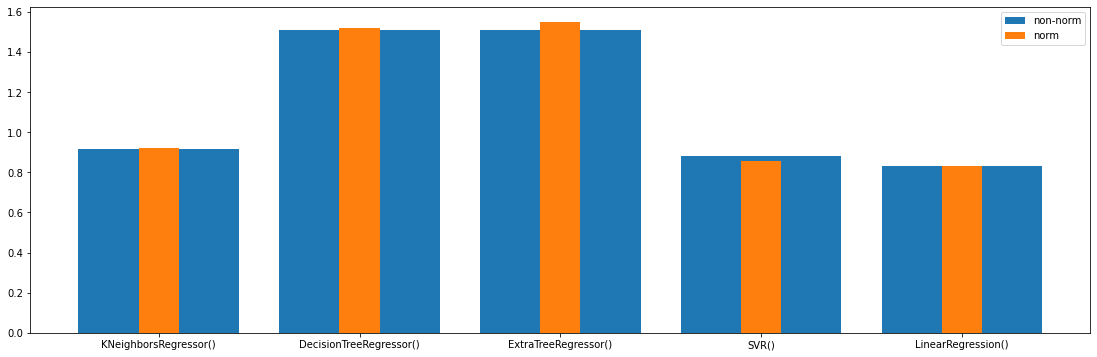

In [23]:
plt.figure(figsize=(19, 6))
plt.bar(mse.keys(), mse.values(), label = 'non-norm')
plt.bar(mse_normalized.keys(), mse_normalized.values(), width = 0.2, label = 'norm')
plt.legend()

In [24]:
mse, mae, mse_normalized, mae_normalized  = test_model(df_selected, models, 'rating_score')

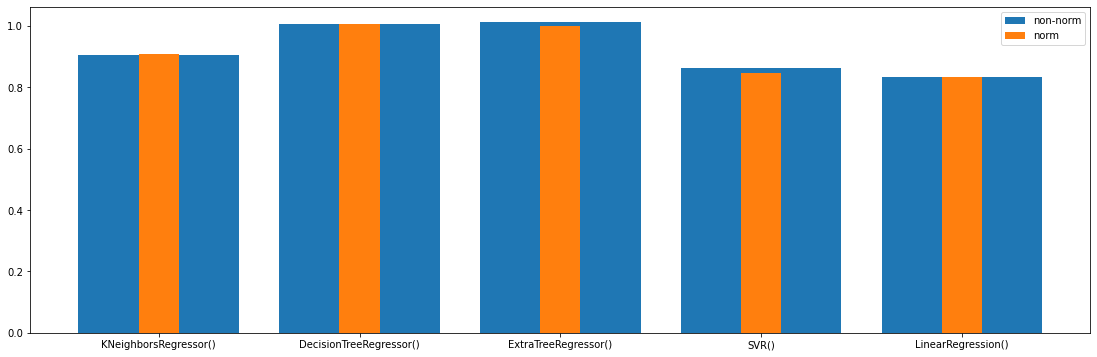

In [25]:
plt.figure(figsize=(19, 6))
plt.bar(mse.keys(), mse.values(), label = 'non-norm')
plt.bar(mse_normalized.keys(), mse_normalized.values(), width = 0.2, label = 'norm')
plt.legend()

In [26]:
mse

{'KNeighborsRegressor()': 0.9063750333422246,
 'DecisionTreeRegressor()': 1.0048694554614659,
 'ExtraTreeRegressor()': 1.0122246173732665,
 'SVR()': 0.8632576403188827,
 'LinearRegression()': 0.8322757183960529}

In [27]:
mae

{'KNeighborsRegressor()': 0.7501200320085357,
 'DecisionTreeRegressor()': 0.7641955453585096,
 'ExtraTreeRegressor()': 0.769806203621531,
 'SVR()': 0.7137977978593515,
 'LinearRegression()': 0.7416929966108433}

In [28]:
mse_normalized

{'KNeighborsRegressor()': 0.9097199253134169,
 'DecisionTreeRegressor()': 1.0061715075920572,
 'ExtraTreeRegressor()': 0.9988420827564349,
 'SVR()': 0.8471716654161345,
 'LinearRegression()': 0.8322757183960529}

In [29]:
mae_normalized

{'KNeighborsRegressor()': 0.7504667911443053,
 'DecisionTreeRegressor()': 0.7646240576751193,
 'ExtraTreeRegressor()': 0.7641090998812808,
 'SVR()': 0.7040241093498096,
 'LinearRegression()': 0.7416929966108439}

In [30]:
from sklearn.pipeline import Pipeline

In [32]:
pipe = Pipeline(
[
    ('scaler', StandardScaler()),
    ('linear_model', LinearRegression())
])

In [33]:
X = df_selected.drop(['rating_score'], axis = 1).values
Y = df_selected['rating_score'].values

In [34]:
pipe.fit(X, Y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_model', LinearRegression())])

In [35]:
import pickle

In [36]:
pickle.dump(pipe, open('pipe.pkl', 'wb'))

In [37]:
df_selected

,critic_likes,critic_comments,movie_release_year,movie_popularity,avg_list_comments,rating_score
0,0,0,2005.0,1.0,1.923077,2.0
1,0,0,2005.0,1.0,0.416667,2.0
2,0,0,2005.0,1.0,0.200000,3.0
3,0,0,2005.0,1.0,0.166667,3.0
4,0,0,2005.0,1.0,0.466667,4.0
...,...,...,...,...,...,...
29986,0,0,1957.0,9.0,0.000000,1.0
29987,0,0,1957.0,9.0,0.000000,4.0
29988,0,0,1957.0,9.0,0.000000,2.0
29989,0,0,1957.0,9.0,0.000000,2.0


In [38]:
pipe['linear_model'].coef_

array([ 0.0837054 , -0.0373423 , -0.10074845,  0.22092385, -0.02189592])

In [39]:
coef_names = list(df_selected.iloc[:, :-1].columns)
coef_values = list(pipe['linear_model'].coef_)

<BarContainer object of 5 artists>

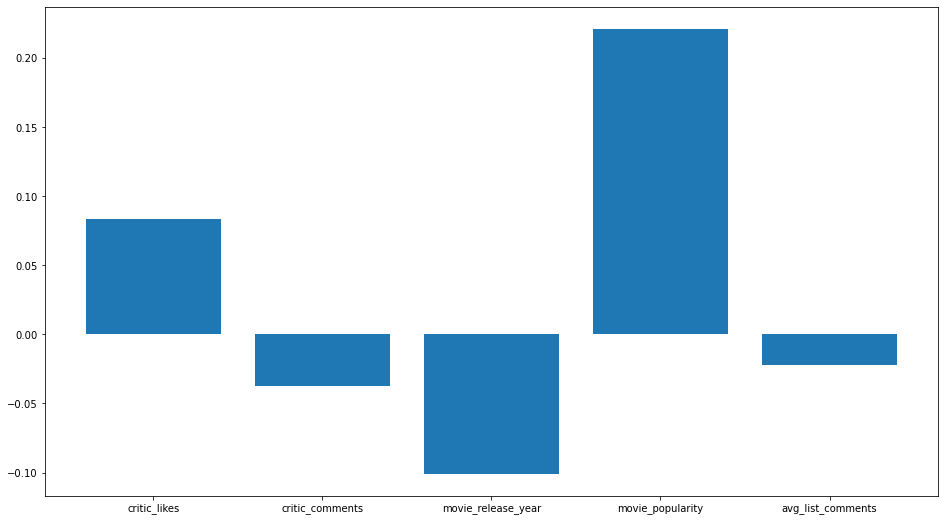

In [42]:
plt.figure(figsize=(16, 9))
plt.bar(coef_names, coef_values)